In [1]:
#
# Import Libraries
#

import pickle
from dotmap import DotMap
import os
import numpy as np
import pandas as pd
import sys
from functools import reduce
import glob

import plotly.graph_objects as go
from plotly.subplots import make_subplots


utilsPath = r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils'
if utilsPath not in sys.path:
    sys.path.append(utilsPath)

from MyCorrelations import Xsplit, MyCorrelations
from pvalues_correlations import getH0, plotNullAlt, get_pvalues, graph_size, get_corrThr, adjust_pvalues

In [2]:
#
# Set constants
#

Qworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Proteomics\AWHS"
Mworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metabolomics\AWHS"

# X
xq_path = os.path.join(Qworking_path, "WorkingFiles", "Xq_minus_X_norm.tsv")
mq_path = os.path.join(Mworking_path, "WorkingFiles", "Xm_norm_MS1.tsv")

# Feature info
q2i_path = os.path.join(Qworking_path, "WorkingFiles", "q2info.tsv")
m2i_path = os.path.join(Mworking_path, "WorkingFiles", "m2info.tsv")

# metadata
mdata_path = os.path.join(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metadata\AWHS\WorkingFiles\main_metadata.tsv")

# RPath
rPath = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\AWHS\myRData"

In [3]:
#
# Read data
#

xq = pd.read_csv(xq_path, sep='\t', index_col=0)
xm = pd.read_csv(mq_path, sep='\t', index_col=0)

q2i = pd.read_csv(q2i_path, sep='\t')
m2i = pd.read_csv(m2i_path, sep='\t')

mdata = pd.read_csv(mdata_path, sep='\t', index_col=0)

In [4]:
# Remove TAG
xm = xm.loc[:, np.intersect1d(m2i[m2i.CLASS!='TAG'].fid, xm.columns)]

In [12]:
ctype_omic = {
    # 'psk': ['qq', 'mm', 'qm'],
    # 'pc': ['qq', 'mm'],
    # 'rpc': ['qq', 'mm'],
    # 'cca': ['qm'],
    'rcca': ['qm']
}

In [6]:
#
# Calculate correlations  
#

corr = MyCorrelations(xq, xm, mdata)
#corr.PSK(methods=['pearson', 'spearman', 'kendall'])
#corr.gLasso(test=False)
#corr.PartialCorrelation()
corr.rCCA(rPath)
#corr.CCA()

Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questio

In [7]:
#
# Calculate Null Hypothesis Correlations
#

n = 10

corrSL = []
for xqsi in range(n):

    xqs = xq.copy()
    xms = xm.copy()

    _ = [np.random.shuffle(i) for i in xqs.to_numpy().T]
    _ = [np.random.shuffle(i) for i in xms.to_numpy().T]

    corrS = MyCorrelations(xqs, xms, mdata)
    #corrS.PSK(methods=['pearson', 'spearman', 'kendall'])
    #corrS.gLasso(test=False)
    #corrS.PartialCorrelation()
    corrS.rCCA(rPath)
    #corrS.CCA()
    corrSL.append(corrS)

Start rCCA
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questio

In [8]:
# Write correlations

f = open('corr.pkl', 'wb')
pickle.dump([corr, corrSL], f)
f.close()

In [20]:
# Read correlations

f = open('corr.pkl', 'rb')
corr, corrSL = pickle.load(f)
f.close()

In [9]:
#
# Get null hypothesis
#

h0c = DotMap()

# h0c.psk = getH0(corrSL, 'psk', ['qq', 'mm', 'qm'], ['a', 'c', 'd', 'dc'])
# h0c.rpc = getH0(corrSL, 'rpc', ['qq', 'mm'], ['a', 'c', 'd', 'dc'])
# h0c.pc = getH0(corrSL, 'pc', ['qq', 'mm'], ['a', 'c', 'd', 'dc'])
h0c.rcca = getH0(corrSL, 'rcca', ['qm'], ['a', 'c', 'd', 'dc'])
# h0c.cca = getH0(corrSL, 'cca', ['qm'], ['a', 'c', 'd', 'dc'])

In [13]:
#
# Plot correlations Null vs Alternative
#

files = glob.glob(r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\AWHS\plots\*')
for f in files:
    os.remove(f)

plotNullAlt(corr, h0c, ctype_omic, absolute=False, size=5*10**5)

In [11]:
ctype_omic

{'psk': ['qq', 'mm', 'qm'],
 'pc': ['qq', 'mm'],
 'rpc': ['qq', 'mm'],
 'cca': ['qm'],
 'rcca': ['qm']}

In [14]:
#
# Calculate pvalues
#

pvals = get_pvalues(corr, h0c, ctype_omic, size=10**5)

In [15]:
adpvals = adjust_pvalues(pvals, ctype_omic)

In [16]:
# Write correlations

f = open('pvals.pkl', 'wb')
pickle.dump((pvals, adpvals), f)
f.close()

In [26]:
# Read correlations

f = open('pvals.pkl', 'rb')
pvals, adpvals = pickle.load(f)
f.close()

In [17]:
#
# Get correlation threshold
#

pvalueThr = 0.01
#corrThr = get_corrThr(h0c, pvalueThr, ctype_omic)

#corrThr

In [18]:
#
# Graph size
# Applying adjusted pvalues

#edges, nodes = graph_size(ctype_omic, pvals, pvalueThr=pvalueThr)
edges, nodes = graph_size(ctype_omic, adpvals, pvalueThr=pvalueThr)

In [19]:
edges

,qm
,rcca
a,18919
c,17136
d,37293
dc,34045


In [20]:
nodes

,qm
,rcca
a,540
c,531
d,630
dc,654


: 

In [34]:
print('Graph Density | qq-rpc & mm-rpc & qm-rcca')
print()
print(f'Adjusted p-value: {pvalueThr}')
print()
print(f'qq: {round(100*5915/(xq.shape[1]*(xq.shape[1]-1)/2),2)}%')
print(f'mm: {round(100*1957/(xm.shape[1]*(xm.shape[1]-1)/2),2)}%')
print(f'qm: {round(100*11484/(xq.shape[1]*xm.shape[1]),2)}%')

Graph Density | qq-rpc & mm-rpc & qm-rcca

Adjusted p-value: 0.01

qq: 8.17%
mm: 5.31%
qm: 11.08%


: 

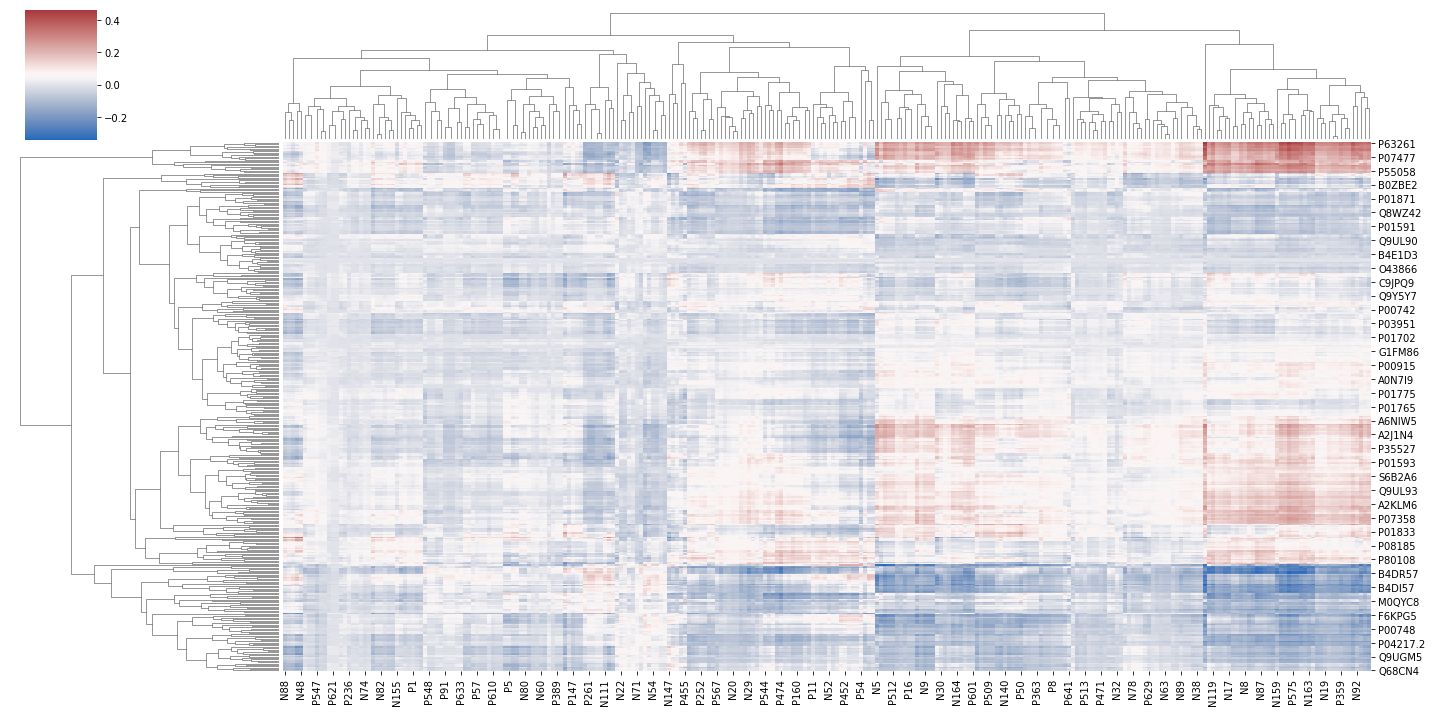

In [32]:
#
# Cluster Map
#

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc


df = corr.rcca.qm.dc
hmap = sns.clustermap(round(df,2), cmap='vlag', annot=False, figsize=(20,10), metric='euclidean', method='average')
